In [1]:
!ls

Untitled.ipynb cube.dat       q.dat          q1.dat


In [2]:
import pandas as pd 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

<class 'numpy.ndarray'> 40 1
<class 'numpy.ndarray'> 40 1
<class 'numpy.ndarray'> 1600 2 (40, 40)
<class 'numpy.ndarray'> 1600 2 (40, 40)
<class 'numpy.ndarray'> 1600 2 (40, 40)


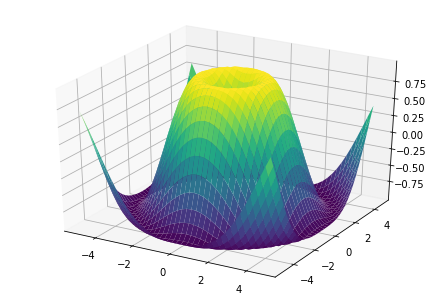

In [3]:
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
print (type(X),X.size,X.ndim)
print (type(Y),Y.size,Y.ndim)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

print (type(X),X.size,X.ndim,X.shape)
print (type(Y),Y.size,Y.ndim,Y.shape) 
print (type(Z),Z.size,Z.ndim,Z.shape)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis)

plt.show()

In [4]:
!tail cube.dat

   30.000000000000000, 30.000000000000000, 21.000000000000000, 1.0000000000000000     
   30.000000000000000, 30.000000000000000, 22.000000000000000, 1.0000000000000000     
   30.000000000000000, 30.000000000000000, 23.000000000000000, 1.0000000000000000     
   30.000000000000000, 30.000000000000000, 24.000000000000000, 1.0000000000000000     
   30.000000000000000, 30.000000000000000, 25.000000000000000,0.99999999999999756     
   30.000000000000000, 30.000000000000000, 26.000000000000000, 9.5743998026241815E-003
   30.000000000000000, 30.000000000000000, 27.000000000000000, 2.1950130567484676E-019
   30.000000000000000, 30.000000000000000, 28.000000000000000, 4.9840743767368497E-036
   30.000000000000000, 30.000000000000000, 29.000000000000000, 1.1317015776499509E-052
   30.000000000000000, 30.000000000000000, 30.000000000000000, 2.5696816781733375E-069


In [16]:
df = pd.read_csv("cube.dat",sep=",", header=None)

In [17]:
df.head()

,0,1,2,3
0,-20.0,-20.0,-20.0,1.000000e+00
1,-20.0,-20.0,-19.0,1.000000e+00
2,-20.0,-20.0,-18.0,1.000000e+00
3,-20.0,-20.0,-17.0,6.239679e-05
4,-20.0,-20.0,-16.0,1.416892e-21


In [18]:
df.columns= ['x','y','z','w']

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132651 entries, 0 to 132650
Data columns (total 4 columns):
x    132651 non-null float64
y    132651 non-null float64
z    132651 non-null float64
w    132651 non-null float64
dtypes: float64(4)
memory usage: 4.0 MB


In [20]:
df 

,x,y,z,w
0,-20.0,-20.0,-20.0,1.000000e+00
1,-20.0,-20.0,-19.0,1.000000e+00
2,-20.0,-20.0,-18.0,1.000000e+00
3,-20.0,-20.0,-17.0,6.239679e-05
4,-20.0,-20.0,-16.0,1.416892e-21
5,-20.0,-20.0,-15.0,3.217245e-38
6,-20.0,-20.0,-14.0,7.305191e-55
7,-20.0,-20.0,-13.0,1.658742e-71
8,-20.0,-20.0,-12.0,3.766399e-88
9,-20.0,-20.0,-11.0,8.552120e-105


In [21]:
# my_X = df['x'].unique()

In [22]:
# my_y = df['y'].unique()

In [23]:
# type(my_X), type(my_y)

In [24]:
# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
# d = -point.dot(normal)

In [25]:
# create x,y
# xx, yy = np.meshgrid(my_X,my_y )

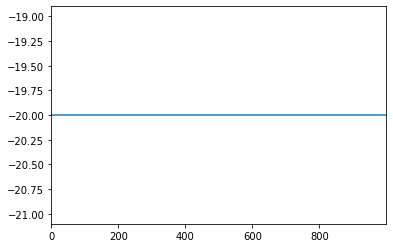

In [33]:
df.x.plot()

In [17]:
# !pip install mayavi 

In [28]:
df= df.head(n=1000)

In [18]:
# Create the data.
from numpy import pi, sin, cos, mgrid
dphi, dtheta = pi/250.0, pi/250.0
[phi,theta] = mgrid[0:pi+dphi*1.5:dphi,0:2*pi+dtheta*1.5:dtheta]
m0 = 4; m1 = 3; m2 = 2; m3 = 3; m4 = 6; m5 = 2; m6 = 6; m7 = 4;
r = sin(m0*phi)**m1 + cos(m2*phi)**m3 + sin(m4*theta)**m5 + cos(m6*theta)**m7
x = r*sin(phi)*cos(theta)
y = r*cos(phi)
z = r*sin(phi)*sin(theta)



In [36]:
# mlab.points3d(x, y, z, s, colormap="copper", scale_factor=.25)
# View it.
from mayavi import mlab
s = mlab.mesh(x, y, z)
mlab.show()

AssertionError: Array x must be 2 dimensional.

In [59]:
x = df['x'].to_numpy()
y = df['y'].to_numpy()
z = df['z'].to_numpy()
w = df['w'].to_numpy()

In [55]:
mlab.points3d(x,y,z)
mlab.show()

In [38]:
s = mlab.plot3d(x, y, z)
mlab.show()

In [23]:
mlab.surf(x,y,z)

ZeroDivisionError: float division by zero

In [24]:
mlab.show()

In [39]:
x, y, z = np.ogrid[-5:5:64j, -5:5:64j, -5:5:64j]

scalars = x * x * 0.5 + y * y + z * z * 2.0

mlab.contour3d(scalars, contours=4, transparent=True)
mlab.show()

In [42]:
type(scalars) , scalars.ndim, scalars.size

(numpy.ndarray, 3, 262144)

In [49]:
# scalars[0].size
type(x)

numpy.ndarray

In [28]:
x, y, z = np.ogrid[-10:10:20j, -10:10:20j, -10:10:20j]
s = np.sin(x*y*z)/(x*y*z)

In [31]:
s.size
s.ndim

3

In [59]:
v = df[['z','w']]

In [60]:
V = v.to_numpy()

In [61]:
V[1]

array([-19.,   1.])

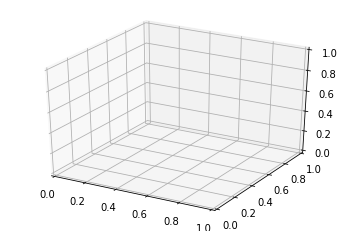

In [39]:
fig = plt.figure()
ax = plt.axes(projection="3d")

plt.show()

In [40]:
z_points = 15 * np.random.random(100)
x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
y_points = np.sin(z_points) + 0.1 * np.random.randn(100)

In [ ]:
fig = plt.figure()
ax = plt.axes(projection="3d")

# z_line = np.linspace(0, 15, 1000)
# x_line = np.cos(z_line)
# y_line = np.sin(z_line)
# ax.plot3D(x_line, y_line, z_line, 'gray')

z_points = z
x_points = x
y_points = y
xx, yy = np.meshgrid(x,y )
ax.contourf(xx, yy,V)

plt.show()

ModuleNotFoundError: No module named 'plotly'

In [57]:
!pip install plotly

     |████████████████████████████████| 7.2MB 5.0MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-cp36-none-any.whl size=11429 sha256=6ad771cfe4b6a0415817fc080448c1a2fe70f66cf440eb7c4ad38ebdc53b56ae
  Stored in directory: /Users/barradd/Library/Caches/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [58]:
import plotly.graph_objects as go

In [ ]:
fig= go.Figure(data=go.Isosurface(
    x=,
    y=,
    z=,
    value=[1,2,3,4,5,6,7,8],
    isomin=2,
    isomax=6,
))

fig.show()
